<a href="https://colab.research.google.com/github/wgova/eda_iris/blob/master/iris_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Packages

In [0]:
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from pandas.plotting import radviz
from pandas.plotting import andrews_curves
from pandas.plotting import parallel_coordinates
import seaborn as sns

import sklearn
from scipy import stats

from IPython.display import set_matplotlib_formats
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot') # Other styles matplotlib.style.available
import warnings; import os
warnings.filterwarnings("ignore")
plt.style.available
plt.style.use('bmh')
plt.close('all')

## Load Dataset

---

In [29]:
url = 'https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/data/iris.csv'
iris = pd.read_csv(url)
iris.rename(columns={'Name':'species'},inplace=True)
iris.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'species'], dtype='object')

## Data preparation

In [30]:
print(iris.info())
iris.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


,SepalLength,SepalWidth,PetalLength,PetalWidth,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


Species is stored as an object, instead of as categorical variable, this will not be ideal since is our target varible. It would be best to store it as a categorical variable

In [31]:
iris.species = iris.species.astype('category')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   SepalLength  150 non-null    float64 
 1   SepalWidth   150 non-null    float64 
 2   PetalLength  150 non-null    float64 
 3   PetalWidth   150 non-null    float64 
 4   species      150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


## The first four moments _of the iris statistical distribution_
The moments desribing the shape of the iris dataset distribution:

1) The mean (which indicates the central tendency of a distribution): varies across all species for each feature, except for Sepal measurements in setosa and versicolor, which are relatively similar 

2) Variance (indicates the width or deviation): PetalWidth has narrow deviations from the mean for all species, while SepalWidth has a slightly wider variation for all species. Sepal and Petal length have much wider deviation

3) Skewness (indicates asymmetric ‘leaning’ to either left or right): Versicolor measurements are all negatively skewed, except for SepalLength, Virginica measurements are all positively skewed, except PetalWidth.

4) The Kurtosis, which indicates the degree of central ‘peakedness’ or, equivalently, the ‘fatness’ of the outer tails, indicates how much the distribution is influence by outliers. The distribution of PetalLength and PetalWidth are negatively influenced by outliers

In [32]:
metrics = ['count', 'min', 'max', 'mean','std','skew']
iris.groupby(by='species').agg(metrics)

SepalLength                   ... PetalWidth                           
                      count  min  max   mean  ...        max   mean       std      skew
species                                       ...                                      
Iris-setosa              50  4.3  5.8  5.006  ...        0.6  0.244  0.107210  1.197243
Iris-versicolor          50  4.9  7.0  5.936  ...        1.8  1.326  0.197753 -0.031180
Iris-virginica           50  4.9  7.9  6.588  ...        2.5  2.026  0.274650 -0.129477

[3 rows x 24 columns]

In [33]:
iris.apply('kurtosis')

SepalLength   -0.552064
SepalWidth     0.290781
PetalLength   -1.401921
PetalWidth    -1.339754
dtype: float64

---

## Visualization

### Scatter matrix plot

At least one pair of features are discrimatory, but there is no evidence that two features will be sufficient to cluster the three species, some feature engineering might be needed. This will be investigated further in the visualisation below.

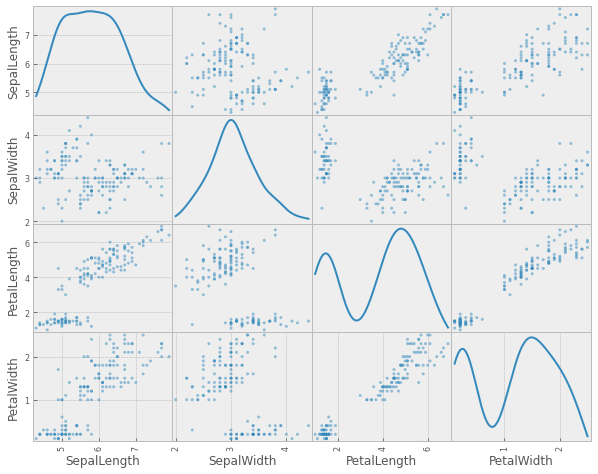

In [49]:
scatter_matrix(iris, figsize=(10,8), diagonal='kde')
plt.show()

### Box plot

Based on the distribution of values within each column, sepal width and sepal length seem like weak discriminators for classification. At least 2 of the characteristics, petal length and petal width look like promising features to distinguish differerent species.


The whiskers extend from the edges of box to show the range of the data. The position of the whiskers is set by default to 1.5 \* IQR (IQR = Q3 - Q1) from the edges of the box. Outlier points are those past the end of the whiskers. Outliers in some of the features need to be excluded from the dataset for models sensitive to outliers like k-means clustering

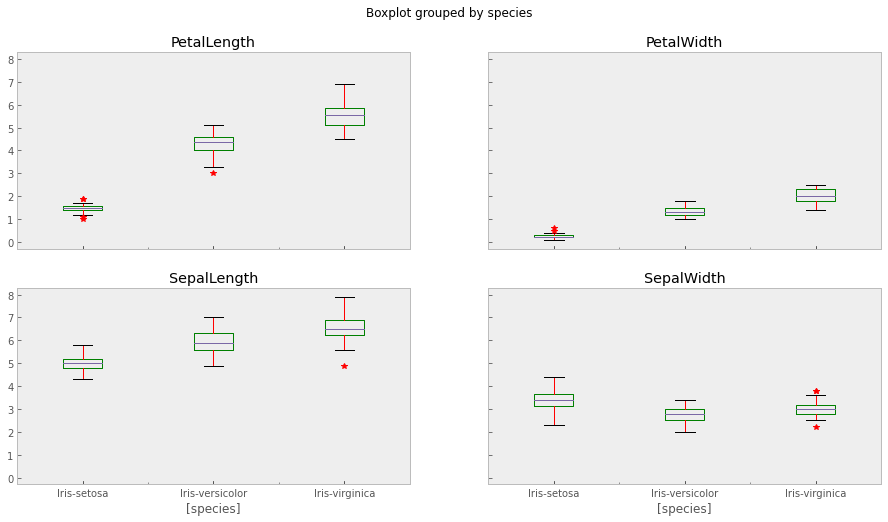

In [52]:
iris.boxplot(by='species', figsize=(15, 8),color={'boxes':'Green','whiskers':'Red'},sym='r*', grid=False)
plt.show()

### Histograms and Kernel Density estimation

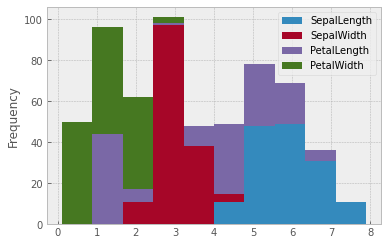

In [67]:
iris.plot.hist(stacked=True,by='species')

The scale of measurements for length are conflated,  but not so much for width. This might affect clustering outcomes

THe kernel density estimation_ (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variable. This function uses Gaussian kernels and includes automatic bandwidth determination. This plot estimates how normally distributed the features are. Petal width and petal length seem to be bi-normally distributed with some overlap, and could be weak discriminators

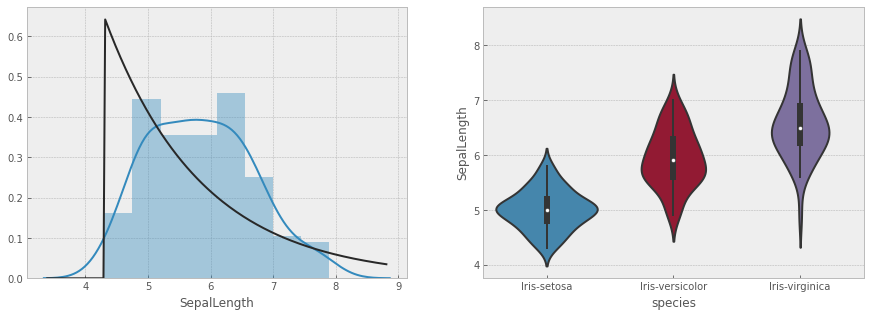

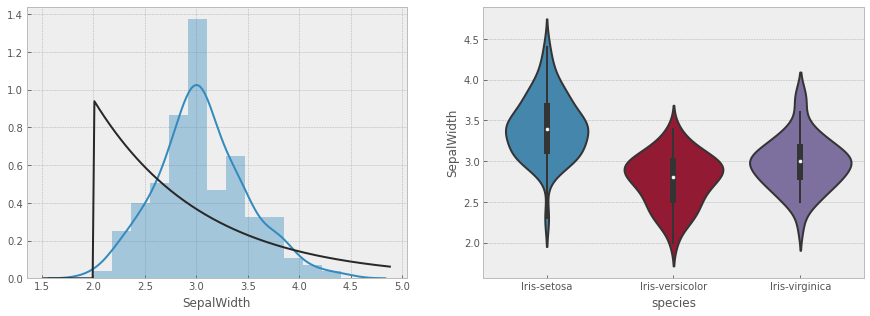

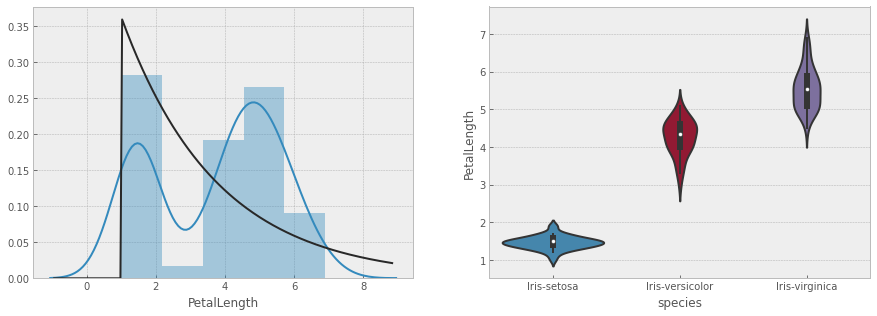

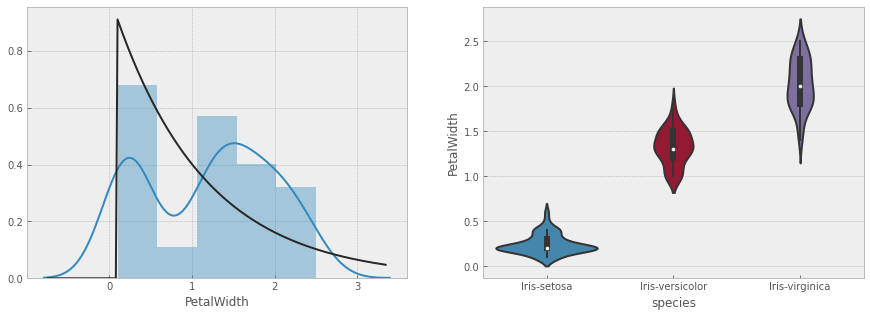

In [68]:
feats = iris.drop(columns=['species'])
for col in feats.columns:
  fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,5), sharex=False)
  sns.distplot(iris[col],fit=stats.expon,hist=True,kde=True,ax=ax1)
  sns.violinplot(data=iris,x='species',y=col,inner='box',ax=ax2)
  plt.show()

Petals measurements are bi-normally distributed and might make clustering using this feature as a discriminator

### Radviz plot

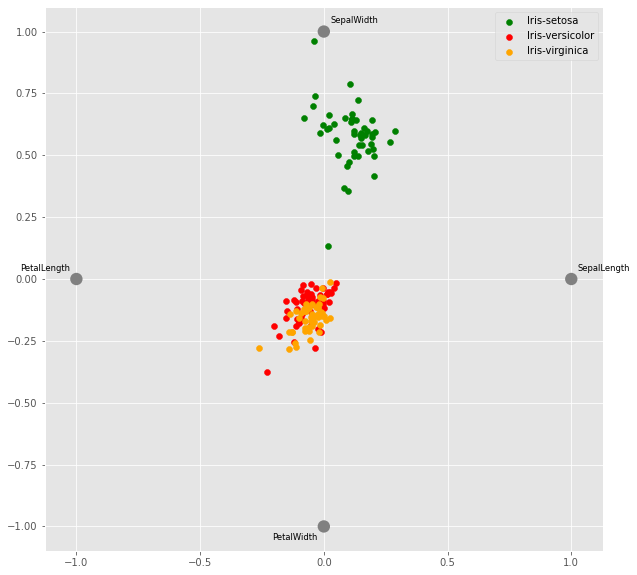

In [36]:
plt.figure(figsize=(10, 10))
radviz(iris, 'species',color=['Green','Red','Orange'])

The Radviz plot helps visualise multi-variate data  based on a simple spring tension minimization algorithm. The set up places points in a plane equally spaced on a unit circle. Each point represents a single attribute. Each sample in the data set is abstractly "attached" to each of these points by a spring, the stiffness of which is proportional to the numerical value of that attribute (they are normalized to unit interval). The point in the plane, where our sample settles to (where the forces acting on our sample are at an equilibrium) is where a dot representing our sample will be drawn. Depending on which class that sample belongs it will be colored differently. 

Virginia and versicolor species seem to have closely matched feature measurements, and might require a third dimension to cluster.

### Andrews curves

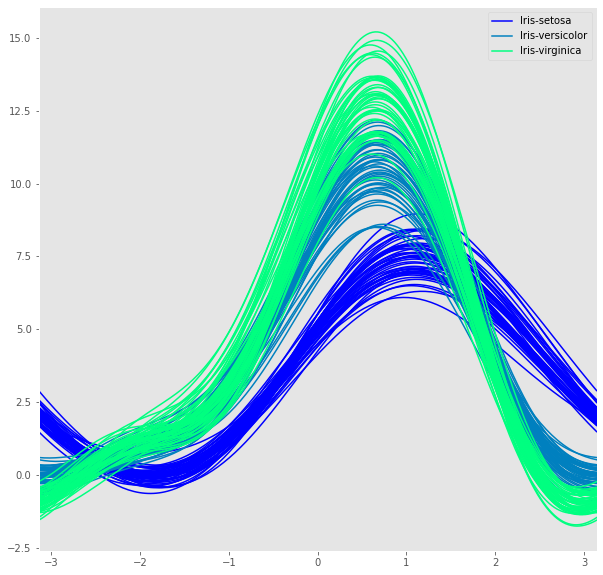

In [39]:
plt.figure(figsize=(10, 10))
andrews_curves(iris, 'species',colormap='winter')

Andrews curves are useful in visualizing multivariate data as a large number of curves that are created using the attributes of samples as coefficients for Fourier series. By coloring these curves differently for each class it is possible to visualize data clustering. Curves belonging to samples of the same class will usually be closer together and form larger structures.

Andrews curves have the functional form of a Fourier series:
```
f(t) = x_1/sqrt(2) + x_2 sin(t) + x_3 cos(t) + x_4 sin(2t) + x_5 cos(2t) + ... 
```
Where x coefficients correspond to the values of each dimension and t is linearly spaced between -pi and +pi. Each row of frame then corresponds to a single curve.

The iris dataset has 2 distinct classes, but the third class is visibly related to one of the other two classes. 

### Parallel coordinates

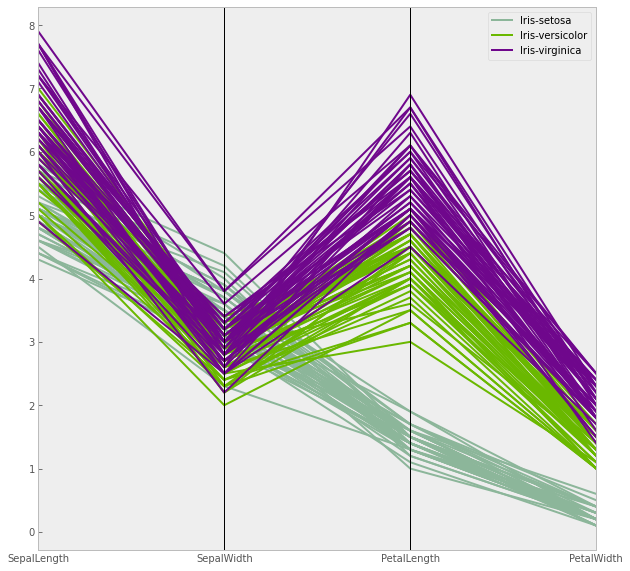

In [69]:
plt.figure(figsize=(10, 10))
parallel_coordinates(iris, 'species')
plt.show()

---

Parallel coordinates help with visualizing clusters in data and to estimate other statistics visually. Using parallel coordinates points are represented as connected line segments. Each vertical line represents one attribute. One set of connected line segments represents one data point. Points that tend to cluster will appear closer together.

In the iris dataset, Petal length has potential have high discriminatory power for clustering compared to the other three attributes

## Seaborn Visualization

In [0]:
# Jointplot (bivariate distributions)
s

In [0]:
# pairwise relationship
sns.pairplot(iris,
             hue='species')

In [0]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot, shade=True)
g.map_offdiag(sns.kdeplot, cmap="Blues_r", n_levels=5)

### Categorical Data

In [0]:
iris.columns

In [0]:
# iris['above_sepal_width_mean'] = iris['SepalWidth'] > iris['SepalWidth'].mean()
fig, axes = plt.subplots(1,2,figsize=(15, 5), sharex=False)
sns.jointplot(iris,x='SepalLength',y='SepalWidth',kind='scatter',ax=axes[0,0])
sns.jointplot(iris,x='PetalLength',y='PetalWidth',kind='scatter',ax=axes[0,1])
plt.setp(axes, yticks=[])
plt.tight_layout()

#### Scatterplot

In [0]:
sns.stripplot(data=iris,
              x='species',
              y='sepal_width',
              hue='above_sepal_width_mean',
              jitter=True)

---

## k-Means

Adapted from [sklearn docs](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html)

In [0]:
X = iris.drop(columns=['species'])
y = iris['species']

from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
km.fit(X)

centers = km.cluster_centers_